# Keystroke Dynamics Authentication

**Biometrics Project**  done by:<br>
CB.EN.U4CSE18310 - Chandravadhana. A<br>
CB.EN.U4CSE18328 - Juvvala Hemantha Sai Sandhya<br>
CB.EN.U4CSE18333 - Akhila Kumari K<br>

<img src="files/Images/keystroke.jpg" alt="alt_text" align="left">

# Introduction

Keystroke dynamics uses analysis of keystroke patterns(i.e, how a person presses the keys) to authenticate a user.<br>
It is as a **Behavioural Biometric.**

We aim to use keystroke dynamics to provide <u>non-intrusive</u> real-time <u>authentication of users</u> during <u>proctored exams</u>.

**Capturing the ..**
* duration between 2 keypresses,
* the duration of pressing down a key, and
* the duration between the current key release and the next key press <br>

**.. can provide insights about the user.**

The next time the user logs in, by comparing his/her current typing pattern with his/her previous typing patterns, the platform can authenticate whether the logged in user is legitimate or fraudulent.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import math as m

# Load Dataset

In [2]:
key_df = pd.read_csv("C:\\Users\\Chandra\\Desktop\\Python Projects - Jupyter Notebook\\Biometrics_Proj\\Untitled Folder\\train.csv")
key_df

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,110,0,80,225,306,444,465,575,672,689,...,1638,1735,1785,1884,1928,2040,2057,2186,2284,2504
876,110,0,81,217,289,387,473,954,1057,1091,...,1755,1866,1921,2019,2161,2265,2351,2457,2561,2704
877,110,0,79,216,300,393,519,692,807,807,...,1591,1724,1763,1866,1879,2046,2048,2192,2303,2449
878,110,0,84,200,290,384,476,782,930,943,...,1537,1658,1760,1848,1831,1940,1944,2082,2174,2319


Our Target variable is 'user'.

**Test Dataset**

In [3]:
test_df = pd.read_csv("C:\\Users\\Chandra\\Desktop\\Python Projects - Jupyter Notebook\\Biometrics_Proj\\Untitled Folder\\test.csv")
test_df

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,0,96,239,337,407,537,740,839,928,1047,...,1831,1951,2032,2138,2430,2496,2567,2691,2824,2919
1,0,87,248,319,515,590,734,803,912,983,...,1839,1911,2103,2174,2383,2487,2575,2647,2815,2886
2,0,90,234,312,404,512,667,767,843,940,...,1572,1675,1771,1890,1948,2043,2147,2255,2540,2683
3,0,193,240,356,407,526,607,732,712,769,...,1600,1728,1744,1832,1904,2063,2148,2258,2336,2501
4,0,74,324,394,555,629,926,1026,1194,1328,...,2626,2754,2922,3068,3154,3259,3386,3453,3618,3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,96,250,313,413,512,849,1033,933,1049,...,1785,1856,2088,2160,2422,2568,2472,2616,2682,2813
216,0,85,196,263,384,458,491,618,631,719,...,1361,1419,1456,1535,1591,1659,1727,1818,1994,2041
217,0,88,251,332,415,536,641,828,829,885,...,3931,4049,4354,4448,4593,4753,4769,4853,4889,4993
218,0,96,144,264,240,336,480,576,552,648,...,2064,2135,2256,2306,2472,2544,2520,2591,2735,2799


# Description about the Dataset

* The dataset: Keystroke dynamics challenge 1 | Kaggle has been used in the jupytr notebook. 
* This dataset captures typing attempts of **110 users**.
* Each user has **attempted 8 times** to type the string **‘united states’** and the corresponding timestamps of key **press** and **release** relative to the first key press have been captured.

Training Dataset:
* Number of rows : 880
* Number of columns : 27
* Number of users present: 110

Test Dataset:
* No. of rows in test dataset: 220
* Number of columns : 26


# Primary Observation

**Information:**<br>
Row count, data type, etc.

In [4]:
key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user        880 non-null    int64
 1   press-0     880 non-null    int64
 2   release-0   880 non-null    int64
 3   press-1     880 non-null    int64
 4   release-1   880 non-null    int64
 5   press-2     880 non-null    int64
 6   release-2   880 non-null    int64
 7   press-3     880 non-null    int64
 8   release-3   880 non-null    int64
 9   press-4     880 non-null    int64
 10  release-4   880 non-null    int64
 11  press-5     880 non-null    int64
 12  release-5   880 non-null    int64
 13  press-6     880 non-null    int64
 14  release-6   880 non-null    int64
 15  press-7     880 non-null    int64
 16  release-7   880 non-null    int64
 17  press-8     880 non-null    int64
 18  release-8   880 non-null    int64
 19  press-9     880 non-null    int64
 20  release-9   880 non-null    int6

All features are numerical data type.

Let's see how the data is distributed.

**Distribution:**

In [5]:
key_df.describe()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
count,880.000000,880.0,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,55.500000,0.0,69.740909,192.504545,280.730682,378.078409,460.992045,625.425000,719.445455,792.982955,...,1683.110227,1773.718182,1874.559091,1973.450000,2093.876136,2194.747727,2272.895455,2366.973864,2491.186364,2587.061364
std,31.771009,0.0,35.830579,118.281523,128.337586,243.485675,246.432639,359.327185,362.141729,403.595652,...,654.999470,657.806567,724.772838,725.310795,793.458930,792.913889,856.416953,856.341509,905.936922,905.291522
min,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,4.000000,14.000000,...,667.000000,763.000000,793.000000,924.000000,891.000000,1028.000000,955.000000,1055.000000,1124.000000,1188.000000
25%,28.000000,0.0,50.000000,152.000000,232.000000,281.000000,374.000000,463.000000,561.000000,592.750000,...,1288.500000,1375.000000,1433.500000,1532.500000,1589.750000,1708.000000,1741.750000,1834.250000,1930.500000,2034.500000
50%,55.500000,0.0,72.000000,192.000000,279.000000,358.000000,436.000000,569.000000,663.000000,721.500000,...,1526.000000,1618.500000,1695.000000,1791.500000,1896.000000,1994.000000,2059.500000,2151.000000,2255.500000,2344.000000
75%,83.000000,0.0,94.000000,231.250000,328.000000,424.000000,501.250000,706.500000,800.000000,888.500000,...,1921.250000,2004.000000,2145.000000,2256.000000,2390.250000,2474.500000,2585.750000,2687.250000,2823.250000,2905.750000
max,110.000000,0.0,241.000000,1287.000000,1343.000000,4333.000000,4453.000000,4823.000000,4890.000000,5191.000000,...,7377.000000,7471.000000,7663.000000,7753.000000,8006.000000,8063.000000,8189.000000,8259.000000,8422.000000,8487.000000


In [6]:
key_df.user.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110], dtype=int64)

110 Unique users typed 8 times on 12 keys

In [7]:
user1_df = key_df[key_df['user'] == 1]
user1_df

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
5,1,0,72,144,240,312,413,520,591,712,...,1522,1567,1770,1807,1968,2039,2160,2231,2352,2423
6,1,0,95,143,240,335,423,592,663,807,...,1615,1696,1847,1895,2063,2135,2255,2327,2423,2495
7,1,0,74,144,240,312,376,473,544,688,...,1424,1518,1664,1712,1872,1968,2091,2160,2280,2328


# Preprocessing Steps

# Check for null values

In [8]:
key_df.isnull().sum()

user          0
press-0       0
release-0     0
press-1       0
release-1     0
press-2       0
release-2     0
press-3       0
release-3     0
press-4       0
release-4     0
press-5       0
release-5     0
press-6       0
release-6     0
press-7       0
release-7     0
press-8       0
release-8     0
press-9       0
release-9     0
press-10      0
release-10    0
press-11      0
release-11    0
press-12      0
release-12    0
dtype: int64

All cells are fully filled.

# Timestamps must be positive

In [9]:
key_df.values

array([[   1,    0,  120, ..., 2632, 2752, 2824],
       [   1,    0,   95, ..., 2111, 2231, 2279],
       [   1,    0,   71, ..., 2751, 2871, 2926],
       ...,
       [ 110,    0,   79, ..., 2192, 2303, 2449],
       [ 110,    0,   84, ..., 2082, 2174, 2319],
       [ 110,    0,   64, ..., 2096, 2199, 2358]], dtype=int64)

In [10]:
containsNeg = False
for record in key_df.values:
    #print(record)
    for x in record:
        if(x<0):
            containsNeg = True
            print("Negative Data!")
if(not containsNeg):
    print("All positive data. Is Clean!")

All positive data. Is Clean!


# Taking just a sample with 5 users

Before further analysing the code, let’s consider only 5 of the 110 users i.e. 5x8 = 40 typing patterns.

In [11]:
noOfUsers = 5
sample_key_df = key_df[:noOfUsers*8]

In [12]:
sample_key_df.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182


The data collected by a keystroke logger has just log the timestamps when the key is pressed and released. 

This data can’t provide useful information directly. More useful insights can be drawn only from the **time durations** between these timestamps.

<img src="files/Images/time_duration.png" alt="alt_text" align="left" style="width:525px;height:200px">

=> Here, the smaller keys = key press event & the larger key = key release event.<br>
=> These durations can be used in understanding the user’s typing patterns.

**Press-Press Duration(PPD)      -> pressB - pressA<br>**

**Release-Press Duration (RPD)   -> pressB - releaseA<br>**

**Hold Duration (HD)             -> releaseA - pressA<br>**

=> PPD and RPD are duration between keys whereas HD is for each individual key.

# Press Press Duration

In [13]:
PPD = sample_key_df['press-1'] - sample_key_df['press-0']
print("Time between 2 continues presses:")
PPD[0:10]

Time between 2 continues presses:


0    216
1    168
2    143
3    144
4    166
5    144
6    143
7    144
8    233
9    192
dtype: int64

# Release Press Duration

In [14]:
RPD = sample_key_df['press-1'] - sample_key_df['release-0']
print("Time between a realse of 1 key and press of other:")
RPD[0:10]

Time between a realse of 1 key and press of other:


0     96
1     73
2     72
3     49
4     96
5     72
6     48
7     70
8    145
9     96
dtype: int64

# Hold Duration

In [15]:
HD = sample_key_df['release-0'] - sample_key_df['press-0']
print("Time between a press and release of a key")
HD[0:10]

Time between a press and release of a key


0    120
1     95
2     71
3     95
4     70
5     72
6     95
7     74
8     88
9     96
dtype: int64

Each user has attempted 8 times to type the string **‘united states’** - text having 13 keys that are pressed

In [16]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
for i in range(1,13):
    sample_key_df['PPD-'+str(i)] = sample_key_df['press-'+str(i)] - sample_key_df['press-'+str(i-1)]
    sample_key_df['RPD-'+str(i)] = abs(sample_key_df['press-'+str(i)] - sample_key_df['release-'+str(i-1)])

for i in range(13):
    sample_key_df['HD-'+str(i)] = sample_key_df['release-'+str(i)] - sample_key_df['press-'+str(i)]

13 values of PPD and RPD , 14 values of HD

In [18]:
sample_key_df.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

# Let us see user pattern using Swarmplot

**What is Swarm Plot?**<br>
    Swarm plots depict all the data points. Swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter.

    
=>Using seaborn’s **swarm plot()**, we can generate swarm plots of release-press, press-press, and hold duration for these 5 users.


**RPD time for pressing keys 'u' and 'n'**

RPD-1


Text(0.5, 1.0, 'Swarm of Release-Press Duration for users')

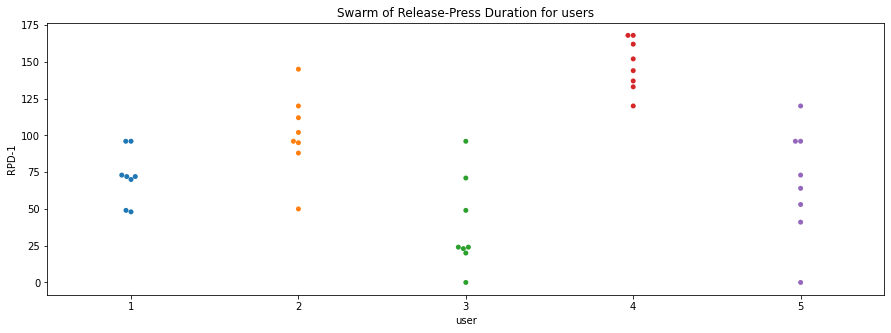

In [19]:
plt.figure(figsize=(15,5))
y='RPD-'+str(1)
print(y)
sns.swarmplot(y='RPD-'+str(1),x='user',data=sample_key_df).set_title('Swarm of Release-Press Duration for users')

Analysing only two keys/letters ‘u’ and ‘n’.<br>
So duration between two key presses for 8 times each user taken for analysis. Therefore 8 datapoints for every user plotted on graph.<br>


**RPD time for pressing keys 'n' and 'i'**

RPD-2


Text(0.5, 1.0, 'Swarm of Release-Press Duration for users')

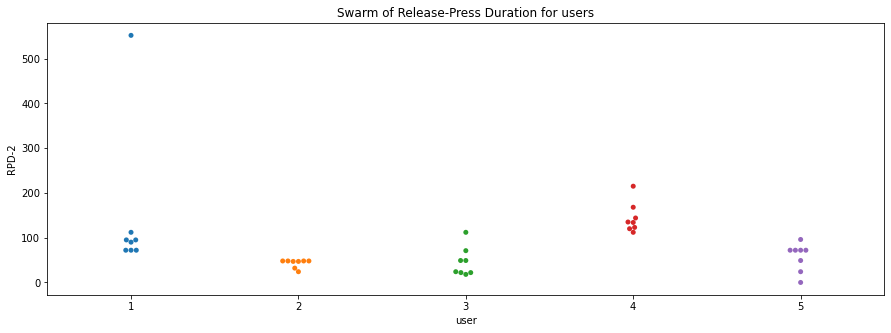

In [20]:
plt.figure(figsize=(15,5))
y='RPD-'+str(2)
print(y)
sns.swarmplot(y='RPD-'+str(2),x='user',data=sample_key_df).set_title('Swarm of Release-Press Duration for users')

From the above two graphs, we don't get the overall typing pattern because we have to take his typing data for all the letters into consideration for coming to conclusions.

# Overall Plot for the full text over 8 repetitions

Therefore, analysis over all 13 keys/letters of ‘united states” i.e 13 X 8 = 104 datapoints for each user plotted on the swarmplot.

**Release Press Duration**

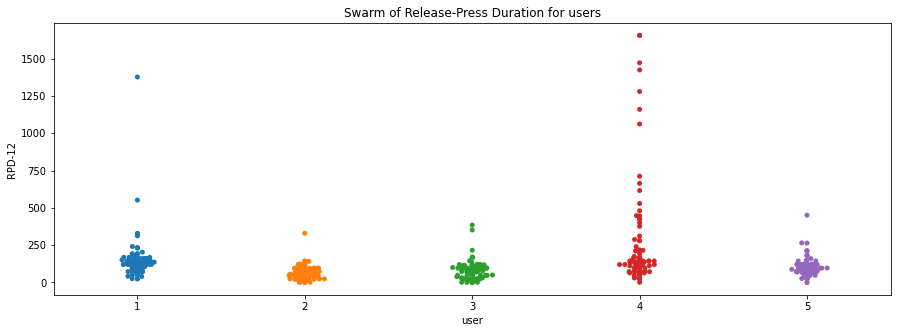

In [21]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=sample_key_df).set_title('Swarm of Release-Press Duration for users')

**Inference:**<br>
We can see RPD for some users is different but for some is similar so RDP cannot solely identify the user.

**Press Press Duration**

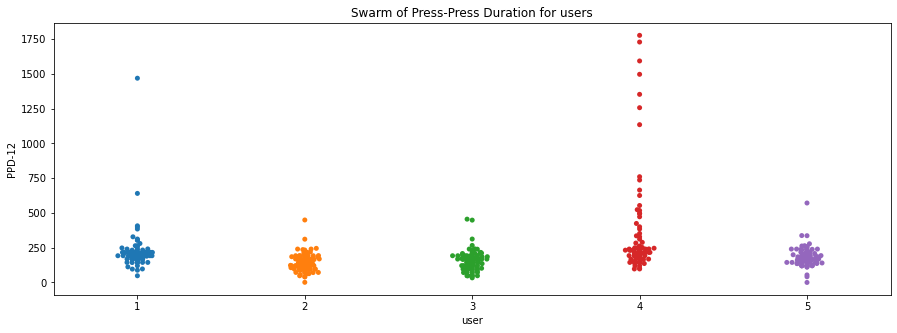

In [22]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=sample_key_df).set_title('Swarm of Press-Press Duration for users')

**Inference:**<br>
Similarly PPD also fails to distinguish properly.

**Hold Duration**

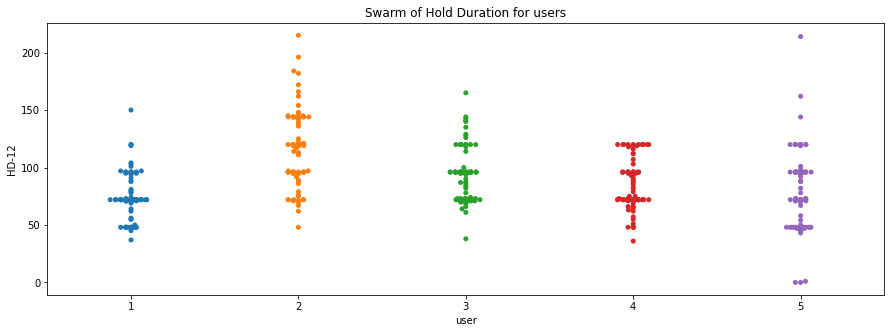

In [23]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=sample_key_df).set_title('Swarm of Hold Duration for users')

**Inference:**<br>
Now, Hold duration shows a different analysis. We can see that people tend to differ in their hold duration which means people take different time duration to press a particular key.

# Observation

As seen from the swarm plots, the press-press duration, release-press durations are roughly the same across all users.<br>
Thus, directly using an **average duration will not be helpful.**<br>

However, hold duration is roughly different for each user which is correct since each user has a different typing speed according to his familiarity with typing. 

# We need to change dimensions in order to analyze the typing patterns across users

Now, **each row** in the dataset **is a typing pattern corresponding to a user**, but if we want to analyse the typing patterns **across users**(timestamps connected by lines), therefore **we need to bring these row features into a single column.**<br>
For this purpose, along with few other pandas functions, we need to use the **wide_to_long** feature of pandas.


**Press Press Duration**

In [24]:
drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = sample_key_df.drop(columns=drop_cols_PPD_analysis)
#print(trainDF_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_PPD_analysis

user  press-  PPD-
id key_no                    
0  1          1     216   216
   2          1     424   208
   3          1     592   168
   4          1     808   216
   5          1    1000   192
...         ...     ...   ...
39 8          5    1267   149
   9          5    1420   153
   10         5    1574   154
   11         5    1710   136
   12         5    1950   240

[480 rows x 3 columns]

For a particular user, there are 12 X 8 times (=96), the typing analysis is done. Therefore, for 5 users: 96 X 5 times (=480). Hence, the shape is 480 X 3.

So, for user: one, the iloc values ranges from 0:12, where each row is the analysis between two consecutive keys/letters. Since there are 13 keys in “United states”, we get 12 comparisons.

In [25]:
trainDF_PPD_analysis.iloc[0:15]

user  press-  PPD-
id key_no                    
0  1          1     216   216
   2          1     424   208
   3          1     592   168
   4          1     808   216
   5          1    1000   192
   6          1    1304   304
   7          1    1496   192
   8          1    1712   216
   9          1    1992   280
   10         1    2376   384
   11         1    2584   208
   12         1    2752   168
1  1          1     168   168
   2          1     360   192
   3          1     527   167

Similarly for user: 5, the iloc values ranges from 0:12 with id = 39.

In [26]:
trainDF_PPD_analysis.iloc[465:480]

user  press-  PPD-
id key_no                    
38 10         5    2257   192
   11         5    2392   135
   12         5    2632   240
39 1          5      54    54
   2          5     246   192
   3          5     431   185
   4          5     598   167
   5          5     718   120
   6          5     974   256
   7          5    1118   144
   8          5    1267   149
   9          5    1420   153
   10         5    1574   154
   11         5    1710   136
   12         5    1950   240

# Plotting the Press Press Durations v/s Press Timestamps

Text(0.5, 1.0, 'Line plots for each key sequence')

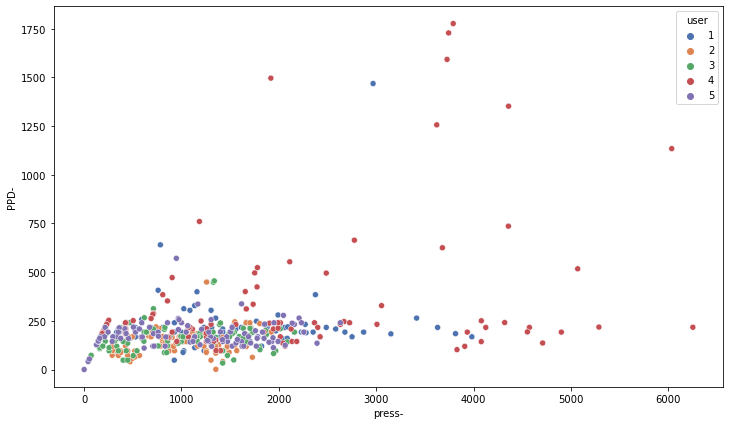

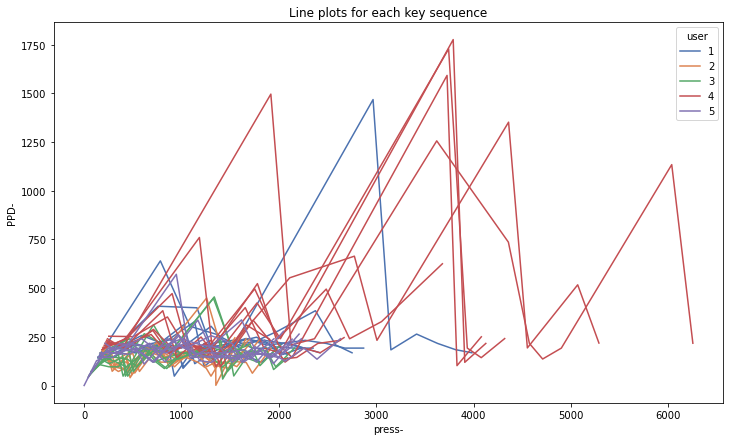

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

plt.figure(figsize=(12,7))
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

* Note, here there are 40 line plots i.e. 8 line plots per user and 5 users are being considered.
* Notice the jagged lines for user 4 (red lines). 
* The PPD suddenly increases and then becomes very low for the next key. 
* This means that this user waits for a relatively longer time before typing in 2 keys back to back. 
* So, we could say this user typically types in groups of 2 keys.
* Now, imagine the level of security if we use sophisticated algorithms to generate insights and devise authentication techniques. 
* This would be something that the user wouldn’t even need to remember.

In [28]:
sample_key_df.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

# Release Press Duration Analysis

In [29]:
drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['press-0'] + ['release-0']

trainDF_RPD_analysis = sample_key_df.drop(columns=drop_cols_RPD_analysis)
#print(trainDF_PPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','release-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_RPD_analysis

user  press-  release-  RPD-
id key_no                              
0  1          1     216       312    96
   2          1     424       496   112
   3          1     592       664    96
   4          1     808       856   144
   5          1    1000      1072   144
...         ...     ...       ...   ...
39 8          5    1267      1310    77
   9          5    1420      1502   110
   10         5    1574      1646    72
   11         5    1710      1806    64
   12         5    1950      2023   144

[480 rows x 4 columns]

Text(0.5, 1.0, 'Line plots for each key sequence')

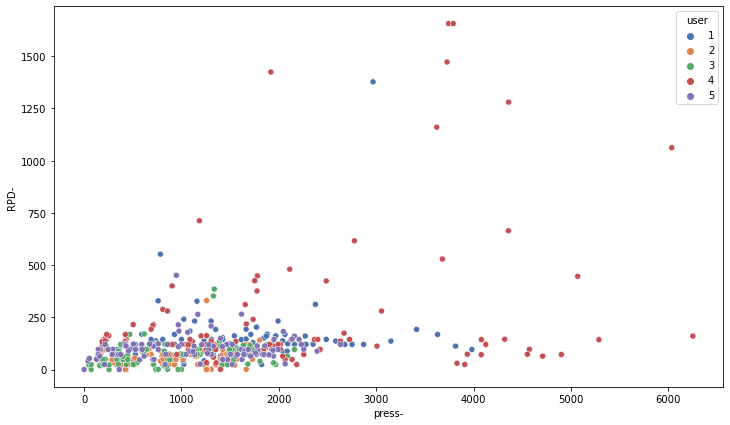

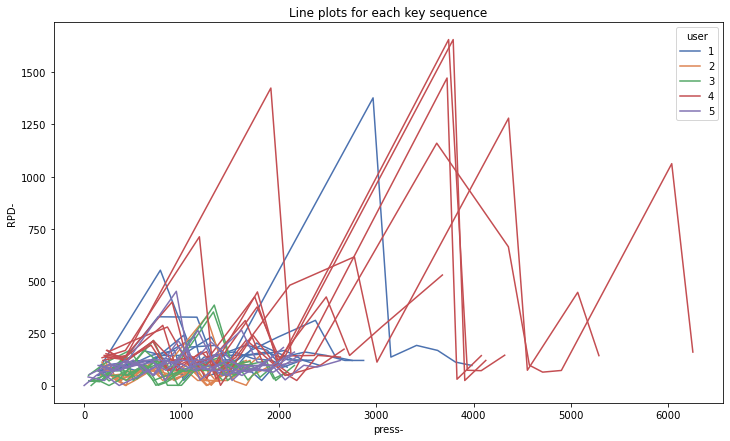

In [30]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

plt.figure(figsize=(12,7))
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

# Hold Duration Analysis

In [31]:
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)]

trainDF_HD_analysis = sample_key_df.drop(columns=drop_cols_HD_analysis)
#print(trainDF_PPD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','release-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_HD_analysis

user  press-  release-  HD-
id key_no                             
0  0          1       0       120  120
   1          1     216       312   96
   2          1     424       496   72
   3          1     592       664   72
   4          1     808       856   48
...         ...     ...       ...  ...
39 8          5    1267      1310   43
   9          5    1420      1502   82
   10         5    1574      1646   72
   11         5    1710      1806   96
   12         5    1950      2023   73

[520 rows x 4 columns]

Text(0.5, 1.0, 'Line plots for each key sequence')

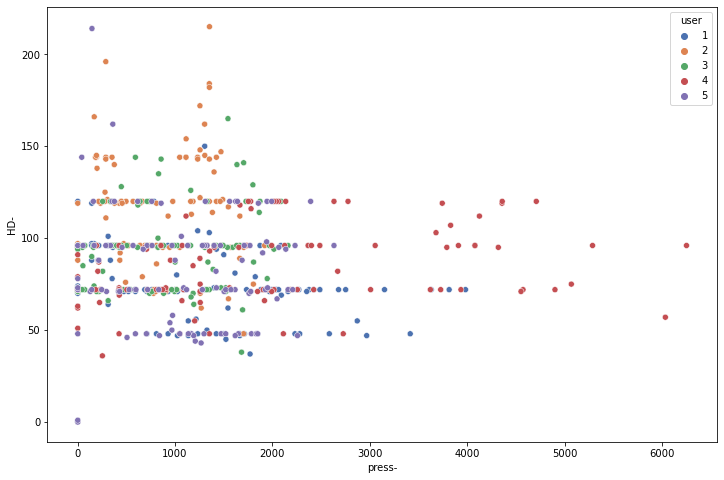

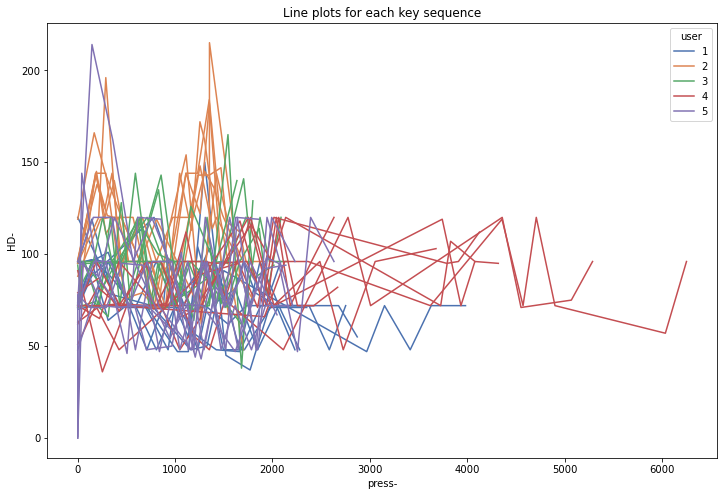

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

plt.figure(figsize=(12,8))
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

Hold duration for each key doesnot have any common pattern.

In [33]:
trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-','release-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')
trainDFCombined

user  press-  release-  HD-   RPD-   PPD-
id key_no                                           
0  0          1       0       120  120    NaN    NaN
   1          1     216       312   96   96.0  216.0
   2          1     424       496   72  112.0  208.0
   3          1     592       664   72   96.0  168.0
   4          1     808       856   48  144.0  216.0
...         ...     ...       ...  ...    ...    ...
39 8          5    1267      1310   43   77.0  149.0
   9          5    1420      1502   82  110.0  153.0
   10         5    1574      1646   72   72.0  154.0
   11         5    1710      1806   96   64.0  136.0
   12         5    1950      2023   73  144.0  240.0

[520 rows x 6 columns]

# Let us prepare the above for the complete Training dataset and Test dataset

**Training dataset**

In [34]:
key_df

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,110,0,80,225,306,444,465,575,672,689,...,1638,1735,1785,1884,1928,2040,2057,2186,2284,2504
876,110,0,81,217,289,387,473,954,1057,1091,...,1755,1866,1921,2019,2161,2265,2351,2457,2561,2704
877,110,0,79,216,300,393,519,692,807,807,...,1591,1724,1763,1866,1879,2046,2048,2192,2303,2449
878,110,0,84,200,290,384,476,782,930,943,...,1537,1658,1760,1848,1831,1940,1944,2082,2174,2319


In [35]:
#Add columns PPD-1 to PPD-13, RPD-1 to RPD-13, HD-0 to HD-13.
for i in range(1,13):
    key_df['PPD-'+str(i)] = key_df['press-'+str(i)] - key_df['press-'+str(i-1)]

for i in range(1,13):
    key_df['RPD-'+str(i)] = abs(key_df['press-'+str(i)] - key_df['release-'+str(i-1)])

for i in range(13):
    key_df['HD-'+str(i)] = key_df['release-'+str(i)] - key_df['press-'+str(i)]

In [36]:
#Changing the dimension for PPD in train dataset
drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']
trainDF_PPD_analysis = key_df.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

In [37]:
#Changing the dimension for RPD in train dataset
drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['press-0'] + ['release-0']
trainDF_RPD_analysis = key_df.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','release-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
#trainDF_RPD_analysis['RPD-'].describe()

In [38]:
#Changing the dimension for HD in train dataset
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)]
trainDF_HD_analysis = key_df.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','release-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

In [39]:
#Joining all these individual tables together
trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-','release-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')
trainDFCombined

user  press-  release-  HD-   RPD-   PPD-
id  key_no                                           
0   0          1       0       120  120    NaN    NaN
    1          1     216       312   96   96.0  216.0
    2          1     424       496   72  112.0  208.0
    3          1     592       664   72   96.0  168.0
    4          1     808       856   48  144.0  216.0
...          ...     ...       ...  ...    ...    ...
879 8        110    1561      1624   63  116.0  216.0
    9        110    1679      1798  119   55.0  118.0
    10       110    1838      1966  128   40.0  159.0
    11       110    1991      2096  105   25.0  153.0
    12       110    2199      2358  159  103.0  208.0

[11440 rows x 6 columns]

**Test dataset**

In [40]:
test_df

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,0,96,239,337,407,537,740,839,928,1047,...,1831,1951,2032,2138,2430,2496,2567,2691,2824,2919
1,0,87,248,319,515,590,734,803,912,983,...,1839,1911,2103,2174,2383,2487,2575,2647,2815,2886
2,0,90,234,312,404,512,667,767,843,940,...,1572,1675,1771,1890,1948,2043,2147,2255,2540,2683
3,0,193,240,356,407,526,607,732,712,769,...,1600,1728,1744,1832,1904,2063,2148,2258,2336,2501
4,0,74,324,394,555,629,926,1026,1194,1328,...,2626,2754,2922,3068,3154,3259,3386,3453,3618,3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,96,250,313,413,512,849,1033,933,1049,...,1785,1856,2088,2160,2422,2568,2472,2616,2682,2813
216,0,85,196,263,384,458,491,618,631,719,...,1361,1419,1456,1535,1591,1659,1727,1818,1994,2041
217,0,88,251,332,415,536,641,828,829,885,...,3931,4049,4354,4448,4593,4753,4769,4853,4889,4993
218,0,96,144,264,240,336,480,576,552,648,...,2064,2135,2256,2306,2472,2544,2520,2591,2735,2799


In [41]:
#Add columns PPD-1 to PPD-13, RPD-1 to RPD-13, HD-0 to HD-13.
for i in range(1,13):
    test_df['PPD-'+str(i)] = test_df['press-'+str(i)] - test_df['press-'+str(i-1)]

for i in range(1,13):
    test_df['RPD-'+str(i)] = test_df['press-'+str(i)] - test_df['release-'+str(i-1)]

for i in range(13):
    test_df['HD-'+str(i)] = test_df['release-'+str(i)] - test_df['press-'+str(i)]

In [42]:
#Changing the dimension for PPD in train dataset
drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']
testDF_PPD_analysis = test_df.drop(columns=drop_cols_PPD_analysis)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])
#testDF_PPD_analysis

In [43]:
#Changing the dimension for RPD in train dataset
drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['press-0'] + ['release-0']
testDF_RPD_analysis = test_df.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','release-','RPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])
#testDF_RPD_analysis

In [44]:
#Changing the dimension for HD in train dataset
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)]
testDF_HD_analysis = test_df.drop(columns=drop_cols_HD_analysis)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','release-','HD-'],i='id',j='key_no').sort_values(by=['id','key_no'])
#testDF_HD_analysis

In [45]:
#Joining all these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-','release-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')
testDFCombined

press-  release-  HD-   RPD-   PPD-
id  key_no                                     
0   0            0        96   96    NaN    NaN
    1          239       337   98  143.0  239.0
    2          407       537  130   70.0  168.0
    3          740       839   99  203.0  333.0
    4          928      1047  119   89.0  188.0
...            ...       ...  ...    ...    ...
219 8         1574      1670   96   80.0  160.0
    9         1705      1747   42   35.0  131.0
    10        1830      1897   67   83.0  125.0
    11        1933      2006   73   36.0  103.0
    12        2150      2198   48  144.0  217.0

[2860 rows x 5 columns]

# Now, let us try to visualize our transformed data

# Histogram

Text(0.5, 1.0, 'Hist of Release-Press Duration')

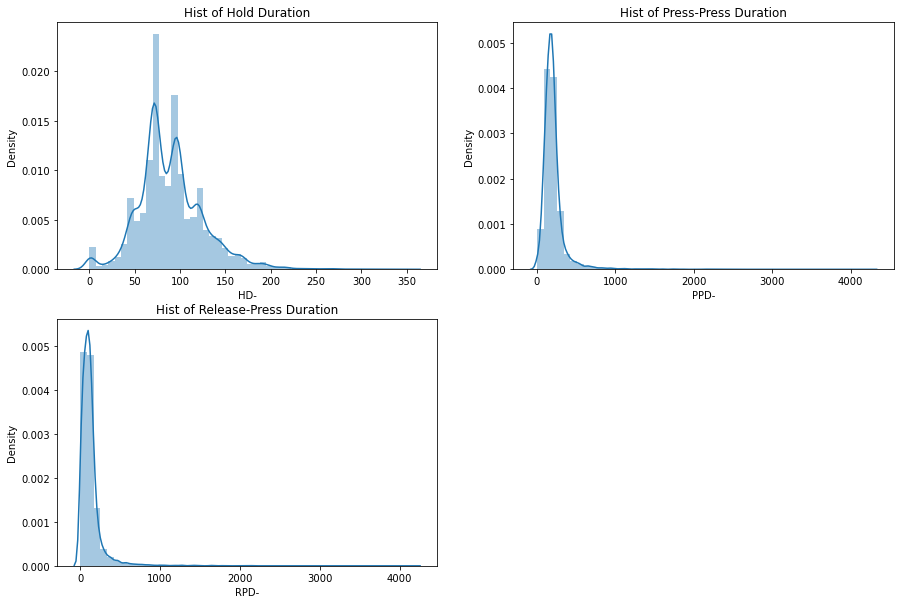

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
plt.subplot(2,2,2)
sns.distplot(trainDFCombined['PPD-']).set_title('Hist of Press-Press Duration')
plt.subplot(2,2,3)
sns.distplot(trainDFCombined['RPD-']).set_title('Hist of Release-Press Duration')

Here, we can see that we can easily classify the people in the **higher bucket of values** and **lower buckets of values**.
* The people in the **Higher bucket of values** take **longer time to type** -> **Slow typers** 
* The people in the **Lower buckets of values** take **shorter time to type** -> **Fast typers**

Rather than us distinguishing slow typers and fast typers by looking the distribution, we can instead classify them into a range of levels. For example, we can divide the above distribution into 10 slots ranging from 0-9, meaning that a person with 0 is the fastest typer of the lot, 5 is typer of an average person and 9 is the slowest typer of the lot.

This process is termed as **Binning**

# Categorize typing style using Binning

There is a special function called **'qcut' in pandas** library that performs **binning** into **'q' cuts**.

In this function we **specify the column name** over which we want to perform the binning/bucketing. This **function checks the distribution of values** in the specified column and **divides the distribution** into **equal frequencies** with **q number of bins**.

In [47]:
noOfBins = 10
labels = [i for i in range(noOfBins)]
labels
#Tag for each type of typer

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
Binned_HD = pd.qcut(trainDFCombined['HD-'],labels=labels,q=noOfBins)
Binned_HD

id   key_no
0    0         8
     1         5
     2         3
     3         3
     4         0
              ..
879  8         1
     9         8
     10        8
     11        7
     12        9
Name: HD-, Length: 11440, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

We can see the categories it has grouped. **Categories (10): \[0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9\]**

In [49]:
classify = {'HD': trainDFCombined['HD-'], 'Binned HD': Binned_HD}
class_df = pd.DataFrame(classify)
class_df

HD Binned HD
id  key_no               
0   0       120         8
    1        96         5
    2        72         3
    3        72         3
    4        48         0
...         ...       ...
879 8        63         1
    9       119         8
    10      128         8
    11      105         7
    12      159         9

[11440 rows x 2 columns]

So, here we can see we have grouped the continuous values into bins.

# So, let us do this to all our durations

We encode the values to labels 0–9 in HD_Bin, PPD_Bin, RPD_Bin corresponding to the bins. <br>

In [50]:
trainDFCombined['HD_Bin'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPD_Bin'],RPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPD_Bin'],PPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)

In [51]:
print('HD Value grouped over 10 bins:\n')
print(HDBins)

HD Value grouped over 10 bins:

[  0.   48.   64.   71.   74.   86.   96.  100.3 118.  136.  348. ]


In [52]:
print('RPD Value grouped over 10 bins:\n')
print(RPDBins)

RPD Value grouped over 10 bins:

[   0.   22.   43.   64.   81.   98.  119.  136.  164.  223. 4182.]


In [53]:
print('PPD Value grouped over 10 bins:\n')
print(PPDBins)

PPD Value grouped over 10 bins:

[   0.   96.  122.  144.  166.  183.  199.  218.  249.  311. 4255.]


We are setting **retbins** to **True** so that we can later **use** these bins **over our test dataset**.<br>

For test datasets, since we already have these bins with us, we need not perform qcut. <br>
Instead we'll use cut which directly assigns the values into the appropriate bin.

Since, there are 12 RPD, 12 PPD, 13 HD values corresponding to the 13 key strokes in a typing pattern, we fill the missing RPD, PPD values by -1.

In [54]:
trainDFCombined['HD_Bin'] = trainDFCombined['HD_Bin'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPD_Bin'] = trainDFCombined['PPD_Bin'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPD_Bin'] = trainDFCombined['RPD_Bin'].astype(str).replace('nan',-1).astype(float)

In [55]:
trainDFCombined

user  press-  release-  HD-   RPD-   PPD-  HD_Bin  RPD_Bin  \
id  key_no                                                               
0   0          1       0       120  120    NaN    NaN       8     -1.0   
    1          1     216       312   96   96.0  216.0       5      4.0   
    2          1     424       496   72  112.0  208.0       3      5.0   
    3          1     592       664   72   96.0  168.0       3      4.0   
    4          1     808       856   48  144.0  216.0       0      7.0   
...          ...     ...       ...  ...    ...    ...     ...      ...   
879 8        110    1561      1624   63  116.0  216.0       1      5.0   
    9        110    1679      1798  119   55.0  118.0       8      2.0   
    10       110    1838      1966  128   40.0  159.0       8      1.0   
    11       110    1991      2096  105   25.0  153.0       7      1.0   
    12       110    2199      2358  159  103.0  208.0       9      5.0   

            PPD_Bin  
id  key_no           
0   0          -1.0  
    1           6.0  
    2           6.0  
    3           4.0  
    4           6.0  
...             ...  
879 8           6.0  
    9           1.0  
    10          3.0  
    11          3.0  
    12          6.0  

[11440 rows x 9 columns]

# Similarly we need to group into buckets in Test Dataset

In [56]:
labels = [i for i in range(noOfBins)]

#Cutting into bins
testDFCombined['HD_Bin'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPD_Bin'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPD_Bin'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

#Filling -1 for Nan value
testDFCombined['HD_Bin'] = testDFCombined['HD_Bin'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPD_Bin'] = testDFCombined['PPD_Bin'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPD_Bin'] = testDFCombined['RPD_Bin'].astype(str).replace('nan',-1).astype(float)

testDFCombined

press-  release-  HD-   RPD-   PPD-  HD_Bin  PPD_Bin  RPD_Bin
id  key_no                                                               
0   0            0        96   96    NaN    NaN     5.0     -1.0     -1.0
    1          239       337   98  143.0  239.0     6.0      9.0      2.0
    2          407       537  130   70.0  168.0     8.0      8.0      0.0
    3          740       839   99  203.0  333.0     6.0      9.0      6.0
    4          928      1047  119   89.0  188.0     8.0      8.0      0.0
...            ...       ...  ...    ...    ...     ...      ...      ...
219 8         1574      1670   96   80.0  160.0     5.0      7.0      0.0
    9         1705      1747   42   35.0  131.0     0.0      6.0      0.0
    10        1830      1897   67   83.0  125.0     2.0      6.0      0.0
    11        1933      2006   73   36.0  103.0     3.0      5.0      0.0
    12        2150      2198   48  144.0  217.0     0.0      8.0      2.0

[2860 rows x 8 columns]

Text(0.5, 1.0, 'Swarm plot of binned hold duration')

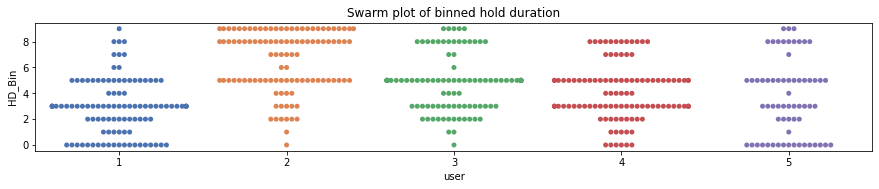

In [57]:
plt.figure(figsize=(15,8))
noOfUsers = 5
plt.subplot(3,1,1)
sns.swarmplot(y='HD_Bin',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')

Text(0.5, 1.0, 'Swarm plot of binned press-press duration')

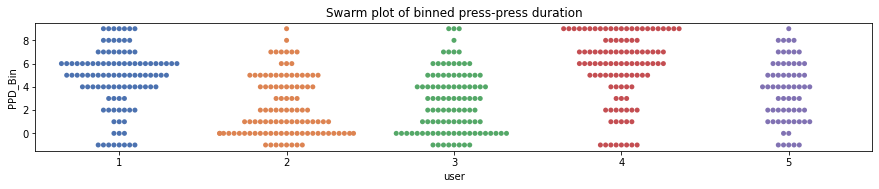

In [58]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,2)
sns.swarmplot(y='PPD_Bin',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-press duration')

Text(0.5, 1.0, 'Swarm plot of binned release-press duration')

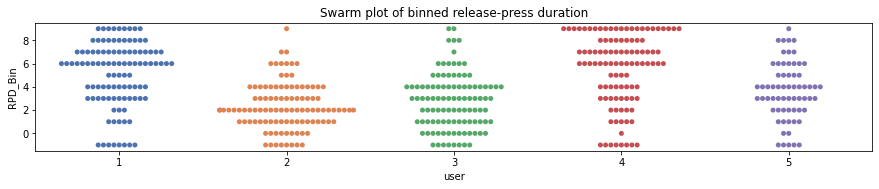

In [59]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,3)
sns.swarmplot(y='RPD_Bin',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-press duration')

This indicates the **Average Speed of every user**. <br>
For example, we can see from the RPD, PPD durations in the swarm plots. 

For instance, **User 4** has many encodings in the **higher range of bins (more HD, PPD, RPD)**.<br>
At the same time, **User 2** has more encodings in the **lower range of bins**.<br>

This implies that **User 4 types relatively slowly than User 2**.

# Important decision on which approach to use

Now, for further processing, we have these options:
1) Aggregate typing patterns of **each user**, consider their **normal distribution** and analyze after putting into **10 bins**.


2) Aggregate typing patterns of **each user** into **average bin value** for every keystroke.<br>


3) Retain **all typing patterns** to train model and validate accuracy.

The <u>1st approach</u> would be best suitable in cases where the **length of the text** sequences is **not fixed**.<br>
For example, you are typing "sun" rather than “united states”, we can compare the time taken with the **rough probabilities for any 2 given keystrokes** (for example, Prob. speed for 'u' and 'n').

The <u>2nd approach</u> inherently **considers the slight variations** in **inter - keystroke durations**.<br>
That is, when typing 'united states', the **relative position of consecutive pairs of keystroke** on the keyboard might lead to variations in duration. But since 2nd approach takes the **average bin value**, it solves this problem.

For our dataset, if we use the average bin values for each user, we will have **only 1 value per user for training** which is **very very less**. Thus, we will go ahead with the **3rd approach** to just **use the encoded values of all the duration data** for training.

# Next step to train our model

Now, previously, in order to determine the bucket value, we had converted the typing patterns (row-wise) into grouped columns.<br>

But in order to use machine learning techniques like KNN, we need to convert these properties/features back into rows. This could help us to identify the closest key dynamics signature for a user.

In [60]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HD_Bin'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPD_Bin'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPD_Bin'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

In [61]:
trainDF_User_HD = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index)
trainDF_User_HD = trainDF_User_HD.add_prefix('HD_')

trainDF_User_PPD = pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index)
trainDF_User_PPD = trainDF_User_PPD.add_prefix('PPD_')

trainDF_User_RPD = pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index)
trainDF_User_RPD = trainDF_User_RPD.add_prefix('RPD_')

In [62]:
trainDF_User_AllSampleProps = trainDF_User_HD.join(trainDF_User_PPD).join(trainDF_User_RPD)
trainDF_User_AllSampleProps = trainDF_User_AllSampleProps.reset_index().set_index('user').drop(columns=['id'])

In [63]:
trainDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
1,8,5,3,3,0,3,5,0,0,3,...,4.0,7.0,7.0,9.0,4.0,8.0,9.0,9.0,6.0,6.0
1,5,6,5,3,2,2,2,1,0,0,...,3.0,7.0,6.0,1.0,6.0,7.0,8.0,8.0,4.0,6.0
1,2,5,8,3,7,3,5,4,3,3,...,8.0,8.0,5.0,3.0,1.0,7.0,7.0,7.0,6.0,6.0
1,5,8,4,3,0,1,5,0,3,0,...,9.0,9.0,6.0,6.0,9.0,6.0,8.0,8.0,5.0,4.0
1,2,3,5,3,0,3,5,3,3,1,...,6.0,5.0,6.0,1.0,3.0,7.0,7.0,6.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4,4,0,6,5,9,8,9,6,6,...,5.0,0.0,5.0,1.0,9.0,2.0,2.0,2.0,0.0,4.0
110,4,3,4,7,6,9,4,7,7,6,...,9.0,1.0,3.0,1.0,6.0,2.0,2.0,7.0,4.0,5.0
110,4,4,8,7,5,9,7,7,8,7,...,8.0,0.0,5.0,1.0,6.0,3.0,1.0,0.0,0.0,5.0


# Need Validation dataset

Our test dataset has only the timestamps without the user id. So, in order to validate our models, we need to keep some validation dataset aside from the training dataset.

We have 110 users but only 8 samples per user, so we need to ensure that enough samples per user are present in training set.<br>
Therefore, during test time, at least few samples must be present for each test user. For this, we perform **StratifiedShuffleSplit**.

# Cross Validation - StratifiedShuffleSplit

<img src="files/Images/cross_validation.png" alt="alt_text" align="left" width="600" height="400">

We are using **StratifiedShuffleSplit** for Cross Validation **so that** the **model** does **not get biased**.

StratifiedShuffleSplit splites the dataset by **equal propertions** that ensures each target value is given importance.

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

In [65]:
trainDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
1,8,5,3,3,0,3,5,0,0,3,...,4.0,7.0,7.0,9.0,4.0,8.0,9.0,9.0,6.0,6.0
1,5,6,5,3,2,2,2,1,0,0,...,3.0,7.0,6.0,1.0,6.0,7.0,8.0,8.0,4.0,6.0
1,2,5,8,3,7,3,5,4,3,3,...,8.0,8.0,5.0,3.0,1.0,7.0,7.0,7.0,6.0,6.0
1,5,8,4,3,0,1,5,0,3,0,...,9.0,9.0,6.0,6.0,9.0,6.0,8.0,8.0,5.0,4.0
1,2,3,5,3,0,3,5,3,3,1,...,6.0,5.0,6.0,1.0,3.0,7.0,7.0,6.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4,4,0,6,5,9,8,9,6,6,...,5.0,0.0,5.0,1.0,9.0,2.0,2.0,2.0,0.0,4.0
110,4,3,4,7,6,9,4,7,7,6,...,9.0,1.0,3.0,1.0,6.0,2.0,2.0,7.0,4.0,5.0
110,4,4,8,7,5,9,7,7,8,7,...,8.0,0.0,5.0,1.0,6.0,3.0,1.0,0.0,0.0,5.0


In [66]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

In [67]:
trainX_allSamples.head()

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
0,8,5,3,3,0,3,5,0,0,3,...,4.0,7.0,7.0,9.0,4.0,8.0,9.0,9.0,6.0,6.0
1,5,6,5,3,2,2,2,1,0,0,...,3.0,7.0,6.0,1.0,6.0,7.0,8.0,8.0,4.0,6.0
2,2,5,8,3,7,3,5,4,3,3,...,8.0,8.0,5.0,3.0,1.0,7.0,7.0,7.0,6.0,6.0
3,5,8,4,3,0,1,5,0,3,0,...,9.0,9.0,6.0,6.0,9.0,6.0,8.0,8.0,5.0,4.0
4,2,3,5,3,0,3,5,3,3,1,...,6.0,5.0,6.0,1.0,3.0,7.0,7.0,6.0,6.0,4.0


In [68]:
trainY_allSamples

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
            ...
            109, 109, 110, 110, 110, 110, 110, 110, 110, 110],
           dtype='int64', name='user', length=880)

In [69]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
i=1;
for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
    print("Split",i)
    print("train split:",train_index.shape)
    print("test split:",test_index.shape,"\n")
    i +=1
train_index

Split 1
train split: (704,)
test split: (176,) 

Split 2
train split: (704,)
test split: (176,) 

Split 3
train split: (704,)
test split: (176,) 

Split 4
train split: (704,)
test split: (176,) 

Split 5
train split: (704,)
test split: (176,) 



array([110, 106, 626, 850, 421, 708, 582, 257, 474,  33,  73, 348, 629,
       523, 237, 740, 133, 777, 171, 845, 307, 618,  93, 243, 201,  59,
       853, 467,  52, 644, 340,  85, 388, 468, 212, 411, 869,  10, 458,
        41, 152, 632, 784, 256, 593, 677, 655, 668, 631, 840, 532, 149,
       643, 374, 878, 749, 329, 490, 354, 380, 432, 576,   9,   0, 574,
       209, 589, 774, 864, 263, 399, 499,  64, 575, 356, 373, 240, 158,
       759, 272,  98, 871, 870, 843, 351,  31, 306, 796, 596, 782, 701,
       281, 536, 874,  32, 846, 167, 725,  12, 539, 326, 736, 430, 150,
       700, 463, 724, 674, 568, 547, 130, 544, 661, 698, 489, 804, 494,
       498, 842, 778, 336, 648,  37, 570,  97, 170, 567, 664, 234, 766,
       400,  96, 265, 185, 425, 510,  26, 836, 288, 573, 464, 610, 771,
       103, 442, 525, 814, 416,  29, 366, 476, 123,  19, 758, 636, 514,
        44, 229, 230, 225, 316, 581, 483,  38, 244, 337, 666, 147, 521,
       204, 342, 485, 707, 650, 228, 530, 611, 669, 719, 154, 33

In [70]:
trainX_allSamples.loc[train_index]

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
110,0,5,1,2,7,5,4,8,6,7,...,9.0,7.0,5.0,3.0,9.0,4.0,3.0,2.0,8.0,7.0
106,6,6,5,6,7,5,7,7,8,8,...,9.0,5.0,8.0,2.0,8.0,3.0,9.0,5.0,7.0,7.0
626,4,2,3,0,5,5,5,5,3,4,...,9.0,3.0,8.0,3.0,8.0,9.0,6.0,4.0,7.0,9.0
850,3,9,6,7,1,2,0,7,2,2,...,0.0,0.0,6.0,3.0,2.0,0.0,2.0,3.0,1.0,1.0
421,5,9,1,8,7,4,3,6,7,8,...,7.0,1.0,8.0,0.0,2.0,7.0,2.0,0.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2,4,2,7,7,8,8,8,8,8,...,8.0,1.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0
849,1,8,7,7,5,4,1,5,1,3,...,0.0,0.0,5.0,4.0,0.0,1.0,2.0,8.0,9.0,1.0
580,9,9,5,9,5,7,8,6,8,9,...,3.0,7.0,7.0,3.0,0.0,2.0,1.0,1.0,4.0,4.0
216,1,1,0,9,5,8,7,8,0,6,...,8.0,1.0,5.0,1.0,9.0,9.0,4.0,5.0,6.0,5.0


# KNN - K Nearest Neighbour Classifier

<img src="files/Images/knn.png" alt="alt_text" align="left" width="400">

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [72]:
split5_trainX = trainX_allSamples.loc[train_index]
split5_trainY = trainY_allSamples[train_index]

In [73]:
k = int(m.sqrt(len(trainX_allSamples)))
print("K = ",k)
knn = KNeighborsClassifier(k)
knn.fit(split5_trainX,split5_trainY)
# Trained the KNN model

K =  29


KNeighborsClassifier(n_neighbors=29)

In [74]:
split5_testX = trainX_allSamples.loc[test_index]
split5_testY = trainY_allSamples[test_index]

In [75]:
#Predict the user
predicted = knn.predict(split5_testX)
predicted

array([  1,   1, 107,  90,  63,  35,  86,  50,  45,  36,  37,  64,  47,
        12,  65,  23,  62,  45,  20,  87,  36,  86,  29,  43,   8,  91,
        86,  45,   2,  86,   8,  77,   2,  45,  70, 110,   2,   3,  50,
        86,  99,  54,  19,  82,  77,  17,   2,  10,  28,  50,  88,   2,
        60, 104,  37,  14,  83,  76,  81,  12,  10,  72,  85,  91,   5,
         9,  45,  66,  55,  63,  84,  39,  35,  30,  50, 100,  12,  45,
         3,  11,  51,  54,  86,  38, 102,  71,   3,  86,  45,  21,  77,
        69,  76,  86,  93,  29,  64,  64,  32,   6,  55,  54,  31,  52,
        28, 105,  23,  12,  78,  38,  50,  21,  53,  31,  17,  64,  58,
        47,  71,  90,  60,  12,  70,  92,  73,  32,   3,  14,   6,  69,
        59,  87,   3,  72,  90, 110,   5,   6,  13, 108,  32,  57,  25,
        38,  58,  35,  45,  55,  25, 106,  47,  97, 106,   4,  98,  66,
         6,   8,   3,  86,   6,   3,  38,  17,  66,  14,   8,  25,  55,
        32,  50,  79,   4,  98,  34,  11], dtype=int64)

In [76]:
actual = np.array(split5_testY)
actual

array([ 40,  61, 107,  27,  63, 103,  41,  99,   1,  36,  37,  34,  65,
        27,  65,  52,  62,  68,  20,  87,   4,  94, 103,  43,   8,  46,
        97,  61,   2,  33,  39,  77,  96,   1,  70,  63,   2,  18,  50,
        47,  26,  85,  19,  82,  37,  73,  53,  10,  28,  78,  88,  80,
        60, 108,  42,  14,  83,  76,  81,  74,  10,  72,  85,  91,   5,
        59,  42,  66,  55,  24,  84,  39,  35,   7,  57, 100,  12,  69,
         3,  11,  51,  54,  41,  38, 102,  71,  22,  33,  45,  21,  77,
        24,  76,  49,  93,  89,  64,  64,  32,   6,  95,  54,  31,  56,
        28, 105,  23, 101,  78,  46,  15,  21,  53,  48,  17,  90,  58,
        40, 110,  25,  60,  96,  70,  92,  73,  32,   3,  14,  52,  69,
        59,  87, 101, 109,  90, 110, 104,  67,  13, 105,  16,  57, 102,
        38,  81,  35,  15,  75,  29, 106,  74,  97,  67,  62,  98,  25,
         6,  30,  68,  86,   9,   9,  92,  17,  66,  43, 108,  26,  98,
         7,  22,  79,  44,  18,  34,  11], dtype=int64)

In [77]:
Accuracy = accuracy_score(predicted,actual) * 100
Accuracy

50.56818181818182

Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

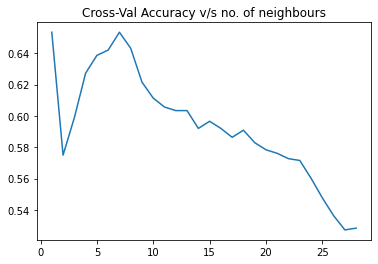

In [92]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

pred_All = []

def getCrossValidationAccuracy(n_neighbours):
    knn_allSamples = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
        knn_allSamples.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
        v = [accuracy_score(knn_allSamples.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])]
        #print(v)
        acc += v
    return sum(acc) / len(acc)

testX = trainX_allSamples.loc[test_index]
testY = trainY_allSamples[test_index]
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,int(m.sqrt(len(trainX_allSamples))))]
Accuracies = pd.DataFrame(range(1,int(m.sqrt(len(trainX_allSamples)))),columns=['K value'])
Accuracies['Accuracies'] = allAttemptsAcc
sns.lineplot(y=allAttemptsAcc,x=range(1,int(m.sqrt(len(trainX_allSamples))))).set_title('Cross-Val Accuracy v/s no. of neighbours')

So when we see the accuracies when k = 0 to 29, we see that highest accuracy is found k < 10.

In [93]:
Accuracies

,K value,Accuracies
0,1,0.653409
1,2,0.575000
2,3,0.598864
3,4,0.627273
4,5,0.638636
5,6,0.642045
6,7,0.653409
7,8,0.643182
8,9,0.621591
9,10,0.611364


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

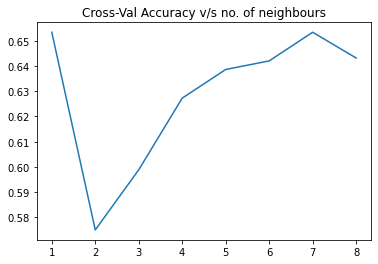

In [94]:
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,9)]
Acc_df = pd.DataFrame(allAttemptsAcc,columns=['Accuracies'])
#print(pd.DataFrame(allAttemptsAcc,columns=['Accuracies']).to_string(index=False))
sns.lineplot(y=allAttemptsAcc,x=range(1,9)).set_title('Cross-Val Accuracy v/s no. of neighbours')

Here, as you can see, the accuracy is high when 1 neighbor is selected. But, usually more than 1 neighbor should be present to confidently determine the user. Thus, 7 neighbors seems to be a good criteria.

In [95]:
print(Acc_df.Accuracies[6] * 100,"% of Accuracy for KNN model with K = 7")

65.3409090909091 % of Accuracy for KNN model with K = 7


# <center>65.34% of Accuracy for KNN model with K = 7</center>

Now, let us put a confusion matrix to analyze how many predictions were false.

# Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [117]:
np.array(testX).shape

(176, 39)

In [118]:
testY.shape

(176,)

In [122]:
#For Test Data
knn_allSamples = KNeighborsClassifier(7)
knn_allSamples.fit(trainX_allSamples,trainY_allSamples)

testPreds_allSamples = knn_allSamples.predict(testX)
predicted_df = pd.DataFrame(testPreds_allSamples,columns = ['user'])
#predicted_df

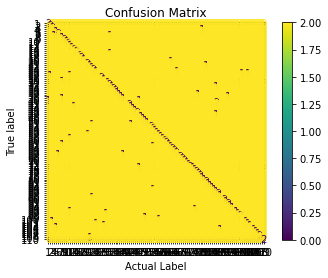

<Figure size 1800x1800 with 0 Axes>

In [121]:
matrix = plot_confusion_matrix(knn_allSamples,testX,testY)
matrix.ax_.set_title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.xlabel("Actual Label")
plt.figure(figsize=(25, 25))
plt.show()

Since our target variable has 110 values our Confusion Matrix is 110 x 110 which is very huge.